In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sci
import matplotlib
import scikit_posthocs as sci_posthocs

import analysis as ana

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=False)
font = {'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}
mpl.rc('font', **font)

# Lodaing Data

In [5]:
brain_data, cog_data, subj_data = ana.load_data('../data')

'In good health': 0, 

'Affective psychosis': 1, 

'Non-affective psychosis': 2

# Correlations

### Features 

In [12]:
cog_f0 = ana.get_group_data(cog_data, group=0, corr=True)
print('control - cognitive feature corr (mean, var)', np.mean(np.array(cog_f0)), np.var(np.array(cog_f0)))
cog_f1 = ana.get_group_data(cog_data, group=1, corr=True)
print('affecti - cognitive feature corr (mean, var)',np.mean(np.array(cog_f1)), np.var(np.array(cog_f1)))
cog_f2 = ana.get_group_data(cog_data, group=2, corr=True)
print('non-aff - cognitive feature corr (mean, var)',np.mean(np.array(cog_f2)), np.var(np.array(cog_f2)))

control - cognitive feature corr (mean, var) 0.09511100088229127 0.07385328335930783
affecti - cognitive feature corr (mean, var) 0.05659606110518432 0.08749907596645783
non-aff - cognitive feature corr (mean, var) 0.10859838695039058 0.10060397717254908


In [13]:
sci_posthocs.posthoc_ttest([np.array(cog_f0).flatten(), np.array(cog_f1).flatten(), np.array(cog_f2).flatten()])

,1,2,3
1,1.000000,3.840858e-05,1.651771e-01
2,0.000038,1.000000e+00,2.678084e-07
3,0.165177,2.678084e-07,1.000000e+00


In [14]:
n=3
stat, p = sci.stats.levene(np.array(cog_f0).flatten(), np.array(cog_f1).flatten(), center='median')
print('control - affecti:', stat, p*3)
stat, p = sci.stats.levene(np.array(cog_f0).flatten(), np.array(cog_f2).flatten(), center='median')
print('control - non-aff:', stat, p*3)
stat, p = sci.stats.levene(np.array(cog_f1).flatten(), np.array(cog_f2).flatten(), center='median')
print('affecti - non-aff:', stat, p*3)

control - affecti: 9.662993998770002 0.005683395940086035
control - non-aff: 57.72317992663518 1.1401079205121446e-13
affecti - non-aff: 19.015666958484655 3.9955087741347594e-05


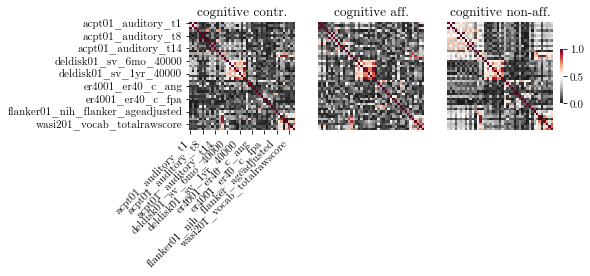

In [21]:
fig, ax = plt.subplots(1,3,figsize=(7,2), gridspec_kw={'width_ratios':[1,1,1.25]})

ax0 = sns.heatmap(abs(cog_f0), ax=ax[0], cbar=False,
                vmin=0, vmax=1, cmap = 'RdGy_r')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=45, ha='right')
ax0.set_title('cognitive contr.')

ax1 = sns.heatmap(abs(cog_f1), ax=ax[1], cbar=False, yticklabels=False, xticklabels=False,
                vmin=0, vmax=1, cmap = 'RdGy_r')
ax1.set_title('cognitive aff.')

ax2 = sns.heatmap(abs(cog_f2), ax=ax[2], yticklabels=False, xticklabels=False,
                cbar_kws={"shrink": 0.5}, vmin=0, vmax=1, cmap = 'RdGy_r')
ax2.set_title('cognitive non-aff.')
cbar = ax2.collections[0].colorbar
plt.savefig('fig/feat_cor_cog.svg', dpi=500, bbox_inches='tight')

In [22]:
brain_f0 = ana.get_group_data(brain_data, 0, brain=True, corr=True)
print('control - brain feature corr (mean, var)', np.mean(np.array(brain_f0)), np.var(np.array(brain_f0)))
brain_f1 = ana.get_group_data(brain_data, 1, brain=True, corr=True)
print('affecti - brain feature corr (mean, var)', np.mean(np.array(brain_f1)), np.var(np.array(brain_f1)))
brain_f2 = ana.get_group_data(brain_data, 2, brain=True, corr=True)
print('non-aff - brain feature corr (mean, var)', np.mean(np.array(brain_f2)), np.var(np.array(brain_f2)))

control - brain feature corr (mean, var) 0.0021944754717790065 0.12385229291332583
affecti - brain feature corr (mean, var) 0.010187273297840756 0.14170002493760636
non-aff - brain feature corr (mean, var) 0.0034893318209966257 0.11375914768691958


In [23]:
sci_posthocs.posthoc_ttest([np.array(brain_f0).flatten(), np.array(brain_f1).flatten(), np.array(brain_f2).flatten()])

,1,2,3
1,1.000000,0.641949,0.936527
2,0.641949,1.000000,0.691165
3,0.936527,0.691165,1.000000


In [24]:
n=3
stat, p = sci.stats.levene(np.array(brain_f0).flatten(), np.array(brain_f1).flatten(), center='median')
print('control - affecti:', stat, p*3)
stat, p = sci.stats.levene(np.array(brain_f0).flatten(), np.array(brain_f2).flatten(), center='median')
print('control - non-aff:', stat, p*3)
stat, p = sci.stats.levene(np.array(brain_f1).flatten(), np.array(brain_f2).flatten(), center='median')
print('affecti - non-aff:', stat, p*3)

control - affecti: 6.426641963864475 0.03397868927986518
control - non-aff: 3.230643478077721 0.21732007737010275
affecti - non-aff: 18.73803098164117 4.7464273067168546e-05


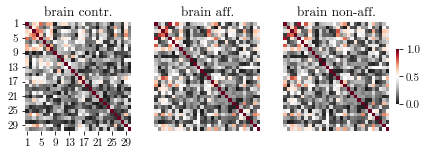

In [25]:
fig, ax = plt.subplots(1,3,figsize=(7,2), gridspec_kw={'width_ratios':[1,1,1.25]})

ax0 = sns.heatmap(abs(brain_f0), ax=ax[0], cbar=False,
                vmin=0, vmax=1, cmap = 'RdGy_r')
ax0.set_yticklabels(ax0.get_yticklabels(), rotation=0, ha='right')
ax0.set_title('brain contr.')

ax1 = sns.heatmap(abs(brain_f1), ax=ax[1], cbar=False, yticklabels=False, xticklabels=False,
                vmin=0, vmax=1, cmap = 'RdGy_r')
ax1.set_title('brain aff.')

ax2 = sns.heatmap(abs(brain_f1), ax=ax[2], yticklabels=False, xticklabels=False,
                cbar_kws={"shrink": 0.5}, vmin=0, vmax=1, cmap = 'RdGy_r')
ax2.set_title('brain non-aff.')
cbar = ax2.collections[0].colorbar
plt.savefig('fig/feat_cor_brain.svg', dpi=500, bbox_inches='tight')

### Subjects

In [6]:
cog_s0 = ana.get_group_data(cog_data, group=0, corr=True, subj=True)
print('control - cognitive subject corr (mean, var)', np.mean(np.array(cog_s0)), np.var(np.array(cog_s0)))
cog_s1 = ana.get_group_data(cog_data, group=1, corr=True, subj=True)
print('affecti - cognitive subject corr (mean, var)', np.mean(np.array(cog_s1)), np.var(np.array(cog_s1)))
cog_s2 = ana.get_group_data(cog_data, group=2, corr=True, subj=True)
print('non-aff - cognitive subject corr (mean, var)', np.mean(np.array(cog_s2)), np.var(np.array(cog_s2)))

control - cognitive subject corr (mean, var) 0.8800125400755766 0.014225761531640901
affecti - cognitive subject corr (mean, var) 0.8368779745176503 0.02176118639930942
non-aff - cognitive subject corr (mean, var) 0.7071387632866616 0.05171389559249265


In [7]:
print(sci.stats.ttest_ind(np.array(cog_s0).flatten(), np.array(cog_s1).flatten()))
print(sci.stats.ttest_ind(np.array(cog_s0).flatten(), np.array(cog_s2).flatten()))
print(sci.stats.ttest_ind(np.array(cog_s1).flatten(), np.array(cog_s2).flatten()))

Ttest_indResult(statistic=7.50087382805657, pvalue=8.515624825815476e-14)
Ttest_indResult(statistic=33.606486207548045, pvalue=1.3239121822628812e-233)
Ttest_indResult(statistic=14.002465328309787, pvalue=5.219493456379691e-44)


In [8]:
sci_posthocs.posthoc_ttest([np.array(cog_s0).flatten(), np.array(cog_s1).flatten(), np.array(cog_s2).flatten()])

,1,2,3
1,1.000000e+00,8.515625e-14,1.323912e-233
2,8.515625e-14,1.000000e+00,5.219493e-44
3,1.323912e-233,5.219493e-44,1.000000e+00


In [9]:
n=3
stat, p = sci.stats.levene(np.array(cog_s0).flatten(), np.array(cog_s1).flatten(), center='median')
print('control - affecti:', stat, p*3)
stat, p = sci.stats.levene(np.array(cog_s0).flatten(), np.array(cog_s2).flatten(), center='median')
print('control - non-aff:', stat, p*3)
stat, p = sci.stats.levene(np.array(cog_s1).flatten(), np.array(cog_s2).flatten(), center='median')
print('affecti - non-aff:', stat, p*3)

control - affecti: 35.07259896538703 1.0718502568316789e-08
control - non-aff: 798.6389206017235 4.607086699476512e-168
affecti - non-aff: 131.33282250273038 1.1037394484806602e-29


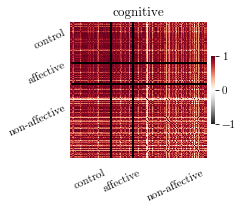

In [10]:
plt.figure(figsize=(3,2.5)) #
c = cog_data.drop(columns=['sex', 'interview_age', 'sestot', 'mot_edscale']).transpose()
c = c.corr()

ax = sns.heatmap(c, yticklabels=False, xticklabels=False,
                #cbar=False,
                cbar_kws={"shrink": .5, "pad":0.02}
                ,vmin=-1, vmax=1,
                cmap = 'RdGy_r')
ax.set(xlabel=None, ylabel=None)
cbar = ax.collections[0].colorbar

ax.hlines([46, 71], *ax.get_xlim(), lw=2, color='black')
ax.vlines([46, 71], *ax.get_xlim(), lw=2, color='black')

ax.text(-4, 30, 'control', rotation=25, ha='right')
ax.text(-4, 70, 'affective', rotation=25, ha='right')
ax.text(-4, 130, 'non-affective', rotation=25, ha='right')

ax.text(2, 166, 'control', rotation=25, va='top')
ax.text(35, 166,  'affective', rotation=25, va='top')
ax.text(85, 166, 'non-affective', rotation=25, va='top')
ax.axis('equal')
ax.set_title('cognitive')

plt.savefig('fig/subj_cor_cog.svg', dpi=500, bbox_inches='tight')

In [56]:
brain_s0 = ana.get_group_data(brain_data, group=0, brain=True, corr=True, subj=True)
print('control - brain subject corr (mean, var)', np.mean(np.array(brain_s0)), np.var(np.array(brain_s0)))
brain_s1 = ana.get_group_data(brain_data, group=1, brain=True,corr=True, subj=True)
print('affecti - brain subject corr (mean, var)', np.mean(np.array(brain_s1)), np.var(np.array(brain_s1)))
brain_s2 = ana.get_group_data(brain_data, group=2, brain=True,corr=True, subj=True)
print('non-aff - brain subject corr (mean, var)', np.mean(np.array(brain_s2)), np.var(np.array(brain_s2)))

control - brain subject corr (mean, var) 0.01876297749859604 0.11771668723607644
affecti - brain subject corr (mean, var) 0.04086990600115189 0.12311082200666543
non-aff - brain subject corr (mean, var) 0.015314213349716499 0.10198826683953433


In [57]:
print(sci.stats.ttest_ind(np.array(brain_s0).flatten(), np.array(brain_s1).flatten()))
print(sci.stats.ttest_ind(np.array(brain_s0).flatten(), np.array(brain_s2).flatten()))
print(sci.stats.ttest_ind(np.array(brain_s1).flatten(), np.array(brain_s2).flatten()))

Ttest_indResult(statistic=-1.4074634183858306, pvalue=0.15940348811344204)
Ttest_indResult(statistic=0.42810927361837864, pvalue=0.6685816196017065)
Ttest_indResult(statistic=1.9012423608908193, pvalue=0.05730767272574404)


In [58]:
sci_posthocs.posthoc_ttest([np.array(brain_s0).flatten(), np.array(brain_s1).flatten(), np.array(brain_s2).flatten()])

,1,2,3
1,1.000000,0.159403,0.668582
2,0.159403,1.000000,0.057308
3,0.668582,0.057308,1.000000


In [59]:
n=3
stat, p = sci.stats.levene(np.array(brain_s0).flatten(), np.array(brain_s1).flatten(), center='median')
print('control - affecti:', stat, p*3)
stat, p = sci.stats.levene(np.array(brain_s0).flatten(), np.array(brain_s2).flatten(), center='median')
print('control - non-aff:', stat, p*3)
stat, p = sci.stats.levene(np.array(brain_s1).flatten(), np.array(brain_s2).flatten(), center='median')
print('affecti - non-aff:', stat, p*3)

control - affecti: 1.2371628585735808 0.7983484656472286
control - non-aff: 21.062054659236797 1.3516687898096301e-05
affecti - non-aff: 2.0075841605470837 0.46966484124152486


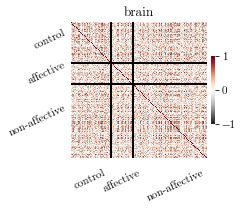

In [60]:
plt.figure(figsize=(3,2.5)) #
c = brain_data.transpose()
c = c.corr()

ax = sns.heatmap(c, yticklabels=False, xticklabels=False,
                #cbar=False,
                cbar_kws={"shrink": .5, "pad":0.02}
                ,vmin=-1, vmax=1,
                cmap = 'RdGy_r')
ax.set(xlabel=None, ylabel=None)
cbar = ax.collections[0].colorbar

ax.hlines([46, 71], *ax.get_xlim(), lw=2, color='black')
ax.vlines([46, 71], *ax.get_xlim(), lw=2, color='black')

ax.text(-4, 30, 'control', rotation=25, ha='right')
ax.text(-4, 70, 'affective', rotation=25, ha='right')
ax.text(-4, 130, 'non-affective', rotation=25, ha='right')

ax.text(2, 166, 'control', rotation=25, va='top')
ax.text(35, 166,  'affective', rotation=25, va='top')
ax.text(85, 166, 'non-affective', rotation=25, va='top')
ax.axis('equal')
ax.set_title('brain')

plt.savefig('fig/subj_cor_brain.svg', dpi=500, bbox_inches='tight')